In [1]:
from azureml import Workspace

ws = Workspace()
ds = ws.datasets['Automobile price data (Raw)']
frame = ds.to_dataframe()

In [2]:
frame.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## ?ì¼ë¡ ííë ê²°ì¸¡ì¹ë¥¼ np.nanì¼ë¡ ë³ê²½íê³  drop

In [3]:
import pandas as pd
import numpy as np
cols = ['price', 'bore', 'stroke', 'horsepower', 'peak-rpm']
## Convert the '?' to a nan
for column in cols:
        frame.loc[frame[column] == '?', column] = np.nan
## Coerce colums to numeric
for col in cols:
    frame[col] = pd.to_numeric(frame[col])
## Drop rows with missing values    
frame.dropna(axis = 0, inplace = True)
print('dimensions = ' + str(frame.shape)) # print dimensions of the data frame
print(frame.dtypes) # print the data types of the columns

dimensions = (195, 26)
symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object


In [4]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 204
Data columns (total 26 columns):
symboling            195 non-null int64
normalized-losses    195 non-null object
make                 195 non-null object
fuel-type            195 non-null object
aspiration           195 non-null object
num-of-doors         195 non-null object
body-style           195 non-null object
drive-wheels         195 non-null object
engine-location      195 non-null object
wheel-base           195 non-null float64
length               195 non-null float64
width                195 non-null float64
height               195 non-null float64
curb-weight          195 non-null int64
engine-type          195 non-null object
num-of-cylinders     195 non-null object
engine-size          195 non-null int64
fuel-system          195 non-null object
bore                 195 non-null float64
stroke               195 non-null float64
compression-ratio    195 non-null float64
horsepower           195 non-n

## ê° ë³ìì ìì½ íµê³ë íí

In [9]:
def describe(df, col):
    ## Compute the summary stats
    desc = df[col].describe()
    
    ## Change the name of the 50% index to median
    idx = desc.index.tolist()
    idx[5] = 'median'
    desc.index = idx
    return desc

In [10]:
describe(frame, 'price')

count       195.000000
mean      13248.015385
std        8056.330093
min        5118.000000
25%        7756.500000
median    10245.000000
75%       16509.000000
max       45400.000000
Name: price, dtype: float64

1. ì¤ìê°ê³¼ íê· ì ì°¨ì´ë¡ ë³´ìì ë íìª½ì¼ë¡ ì¹ì°ì¹ ë¶í¬ë¥¼ ëíëì ì ì ìì.
2. íì¤í¸ì°¨ë¥¼ íµí´ ê°ê²©ì ë²ìê° ìë¹í í¼ì ì¶ì í  ì ìì.
3. ë°ë¼ì ë²ìê° ìë¹í í° ë¹ëì¹­ ë¶í¬ê° ëì¬ê²ì ì¶ì í  ì ìì

## ìì½íµê³ë ìê°í

In [11]:
def plotstats(df, col):
    import matplotlib.pyplot as plt
    ## Setup for ploting two charts one over the other
    fig, ax = plt.subplots(2, 1, figsize = (12,8))
    
    ## First a box plot
    df.dropna().boxplot(col, ax = ax[0], vert=False,
                        return_type='dict')
    ## Plot the histogram   
    temp = df[col].as_matrix()
    ax[1].hist(temp, bins = 30, alpha = 0.7)
    plt.xlabel(col)
    return [col]

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


['price']

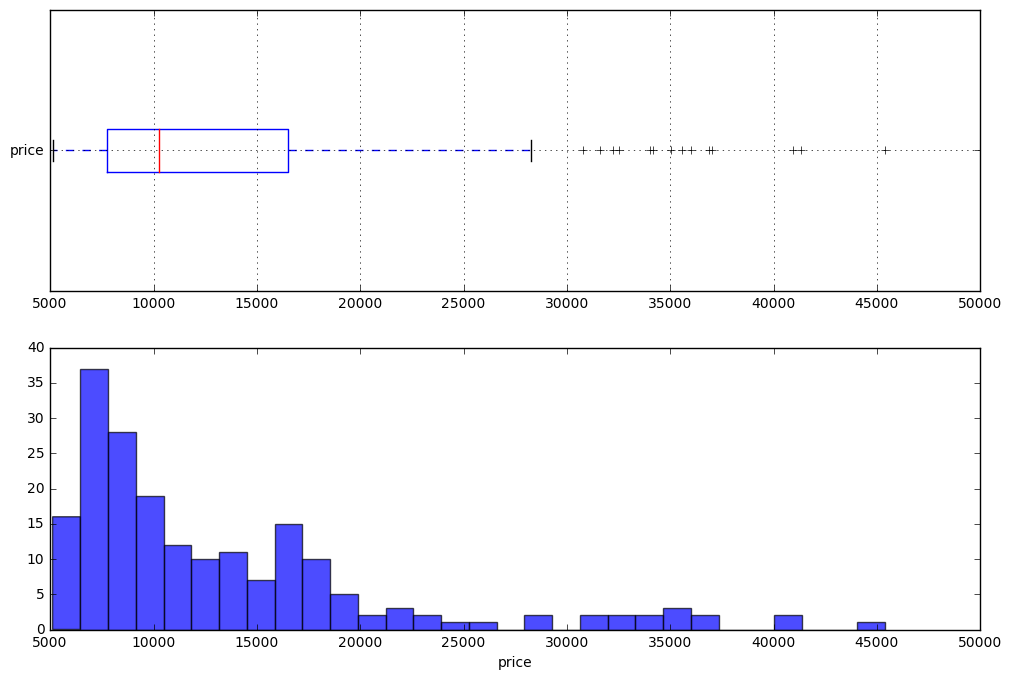

In [12]:
%matplotlib inline
plotstats(frame, 'price')

['engine-size']

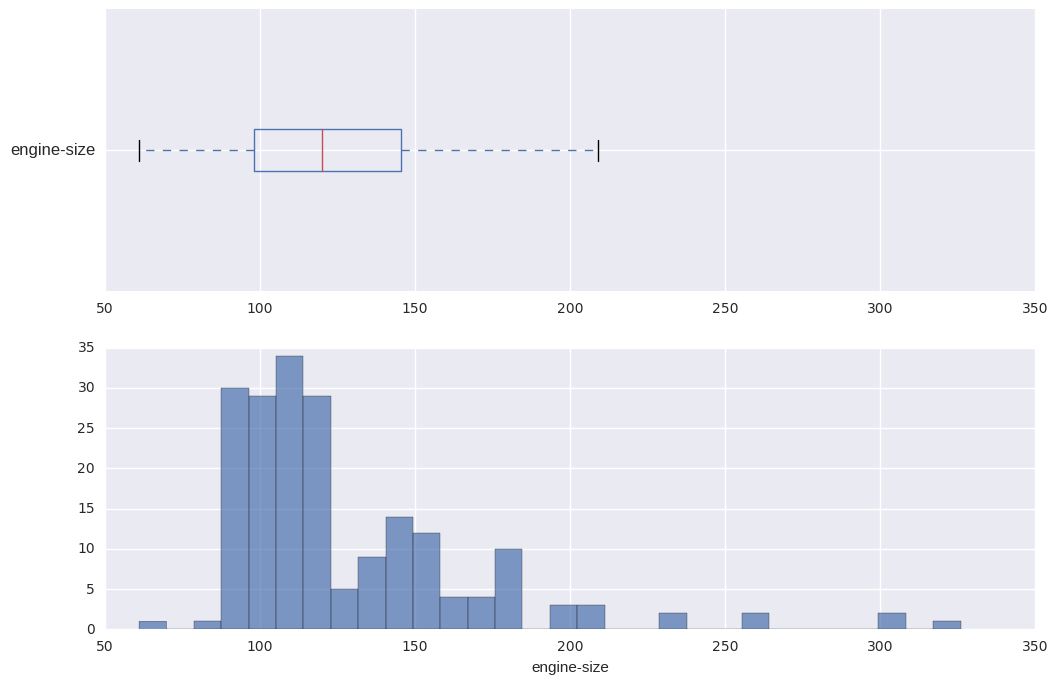

In [25]:
plotstats(frame,'engine-size')

### Seabornì íµí ìê°í

In [22]:
def plotstats_seaborn(df, col):
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.subplot(211)
    sns.boxplot(frame[col])
    plt.subplot(212)
    sns.distplot(frame[col], kde=False, bins=30)
    return [col]

['price']

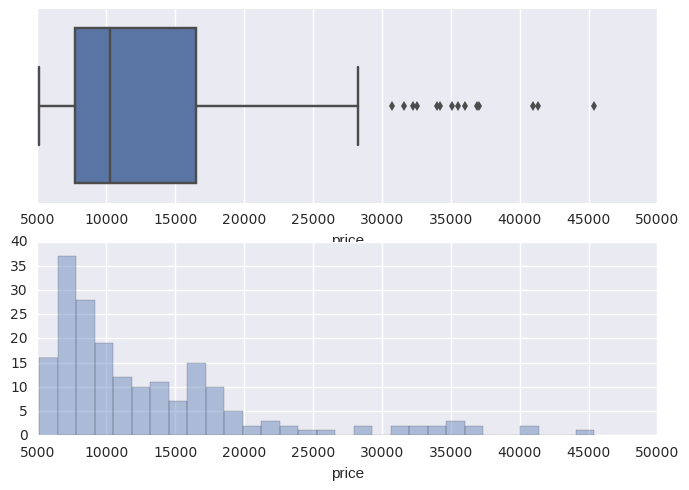

In [24]:
plotstats_seaborn(frame, 'price')

['engine-size']

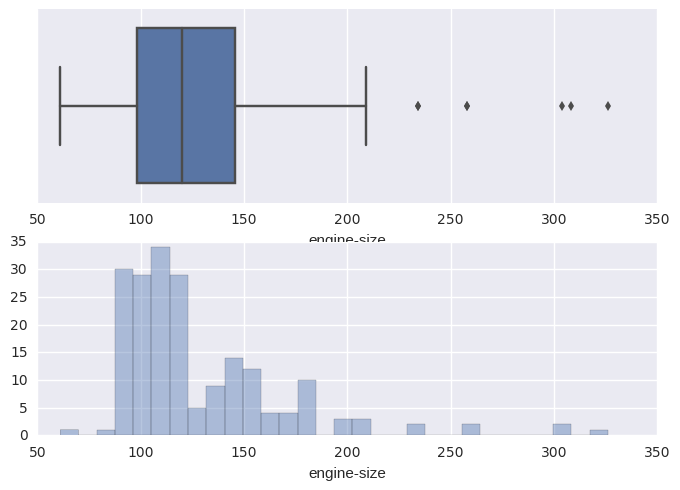

In [26]:
plotstats_seaborn(frame, 'engine-size')

## Compute Correlation

In [28]:
def auto_corr(df, col):
    import matplotlib.pyplot as plt
    import pandas as pd
    
    fig = plt.figure(1, figsize=(9,9))
    ax = fig.gca()
    df.plot(kind= 'scatter', x='price', y=col, ax=ax)
    
    corr = df[['price',col]].corr(method='pearson').as_matrix()[0][1]
    cov = df[['price',col]].cov().as_matrix()[0][1]
    return pd.Series([corr, cov], index=['Correlation', ' Covariance'])

Correlation         0.888942
 Covariance    296733.640127
dtype: float64

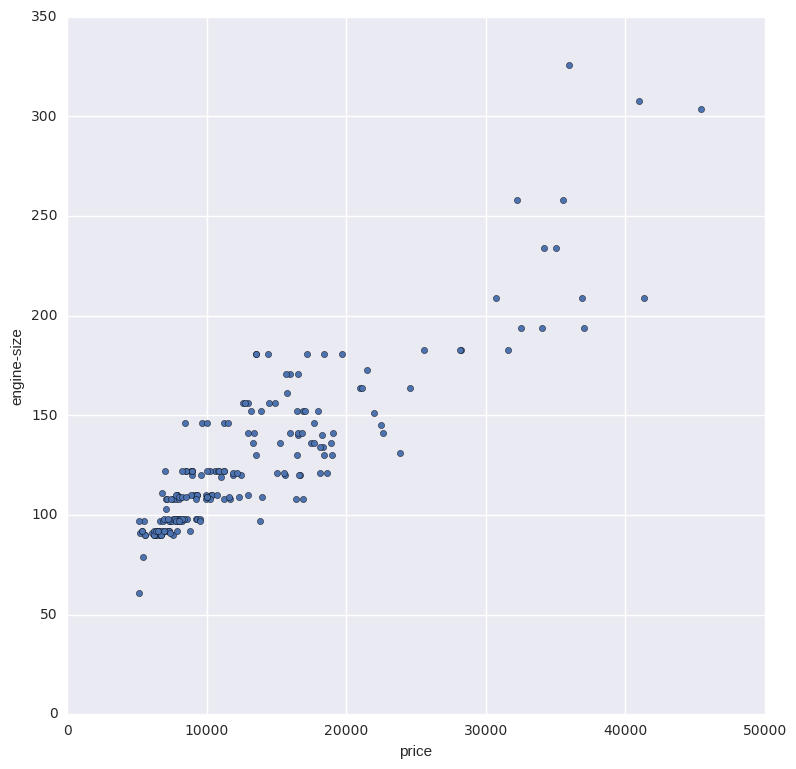

In [29]:
auto_corr(frame, 'engine-size')

Correlation       -0.702685
 Covariance   -36238.614036
dtype: float64

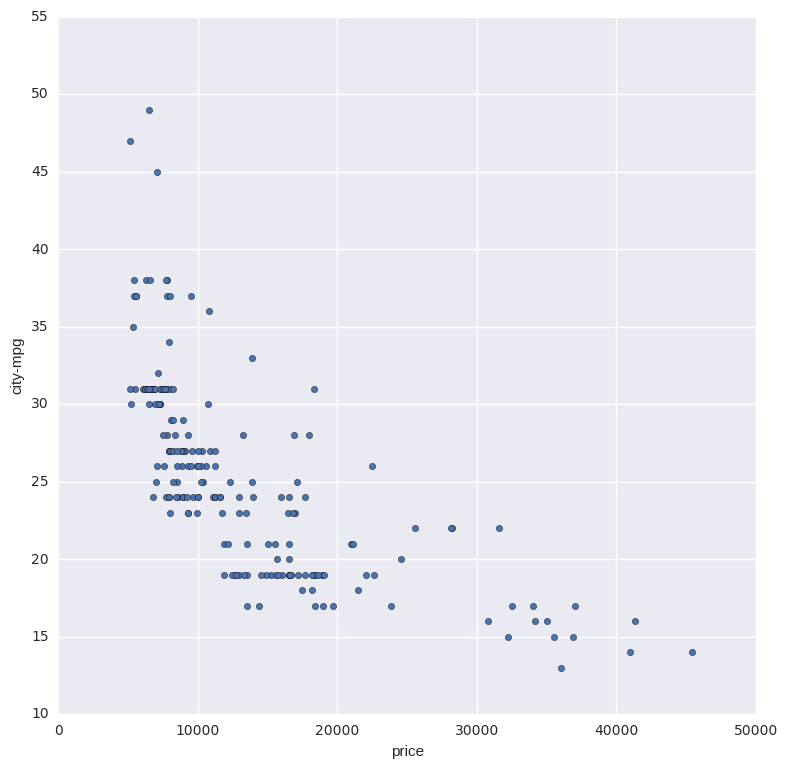

In [30]:
auto_corr(frame,'city-mpg')

1. ìì§ ì¬ì´ì¦ê° í´ ìë¡ ê°ê²©ì´ ëìì§
2. city-mpgê° ëì ìë¡ ê°ê²©ì ë®ìì§